# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom

Lab Number: 1

# Business Understanding - 10 pts

Traffic accidents impact many of us in our daily lives. From being delayed due to an accident to being in an accident ourselves, anytime we are travelling there is a concern that a traffic accident could impact us. The US Accidents dataset is a country wide dataset covering 49 states within the United States. The data has been collected from several data sources which broadcast traffic accident related information. The dataset spans the time period of Feburary 2016 through December 2019. The data was sourced from the Kaggle website (https://www.kaggle.com/sobhanmoosavi/us-accidents).

This data could be leveraged for multiple purposes:

- Alerting drivers to when an accident may occur
- Providing insurance companies information on accident fequencies
- Assisting government agencies in future traffic pattern design and planning

A good prediction algorithm for this data would establish a relationship between the factors in this data file, such as weather, time of day, location, and the severity of an accidents occurrence.


# Data Understanding - 80 pts
<Use Subsections as defined below>

Setup initial requirements for the data analysis prior to EDA. This is for cleanliness of the code base and consistency of outputs.

In [1]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

#set variables for font sizes for plots. This will allow them to be consistent within the notebook
titleFont = 25
axisFont = 15
labelFont = 15

Read in the datafile for analysis and perform a quick test to make sure we read the data in correctly

In [2]:
#read in the data file
df = pd.read_csv('us-accidents.zip')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


## Data Meaning - 10 pts

The US Accidents dataset is a country wide dataset covering 49 states within the United States. The data has been collected from several data sources which broadcast traffic accident related information. The dataset spans the time period of Feburary 2016 through December 2019. The data was sourced from the Kaggle website (https://www.kaggle.com/sobhanmoosavi/us-accidents).

The code below provides a quick check on the shape of the data which will provide the number of rows in the data and number of data columns.

In [3]:
df.shape

(2974335, 49)

From the output above there are 2,974,335 rows of data with 49 initial data columns. 

To gain additional insight into the data, the data types of each column need to be understood. This allows for an understanding of whether the data is categorical or continuous. The code below will provide a summary count of all of the data type values as well as the individual listing of data types for each column

In [4]:
df.dtypes.value_counts()

object     21
float64    14
bool       13
int64       1
dtype: int64

In [5]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

A full summary of the data (Table 1) containing the following information is displayed below:
- column name
- column description
- number of unique values
- data type
- nullable attribution
- % data missing

In [6]:
HTML(filename='./Data Description.html')

Field Name
ID
Source
TMC
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng


## Data Quality - 15 pts

Assessing and addressing the quality of the data set is critical to ensuring a successful execution of further analysis. In this section data quality will be addressed by looking for and correcting: duplicate data and missing data.

Initially check the dataset for any data duplication. This will verify whether the data counts are truly as large as initially seen upon data loading.

In [7]:
#get the shape of the dataframe (number of rows, number of columns)
initShape = df.shape

#remove duplicates from the dataframe
df = df[~df.duplicated()]

#get the shape of the deduplicated dataframe (number of rows, number of columns)
dedupShape = df.shape

#Print out the shape of the initial dataframe, the deduplicated dataframe and 
#determine if there is any duplication in the data
print("Initial Shape: ", initShape)
print("Deduplication Shape: ", dedupShape)


if (initShape == dedupShape):
    print("No Duplicate Data Found")
else:
    print("Duplicate Data Found and removed")

Initial Shape:  (2974335, 49)
Deduplication Shape:  (2974335, 49)
No Duplicate Data Found


As seen from the code execution above there is no duplication found within the data set.

From the initial analysis shown in Table 1 (above) the amount of missing data in the data set is pretty minimal. This section will provide additional verification and address the quality issues.

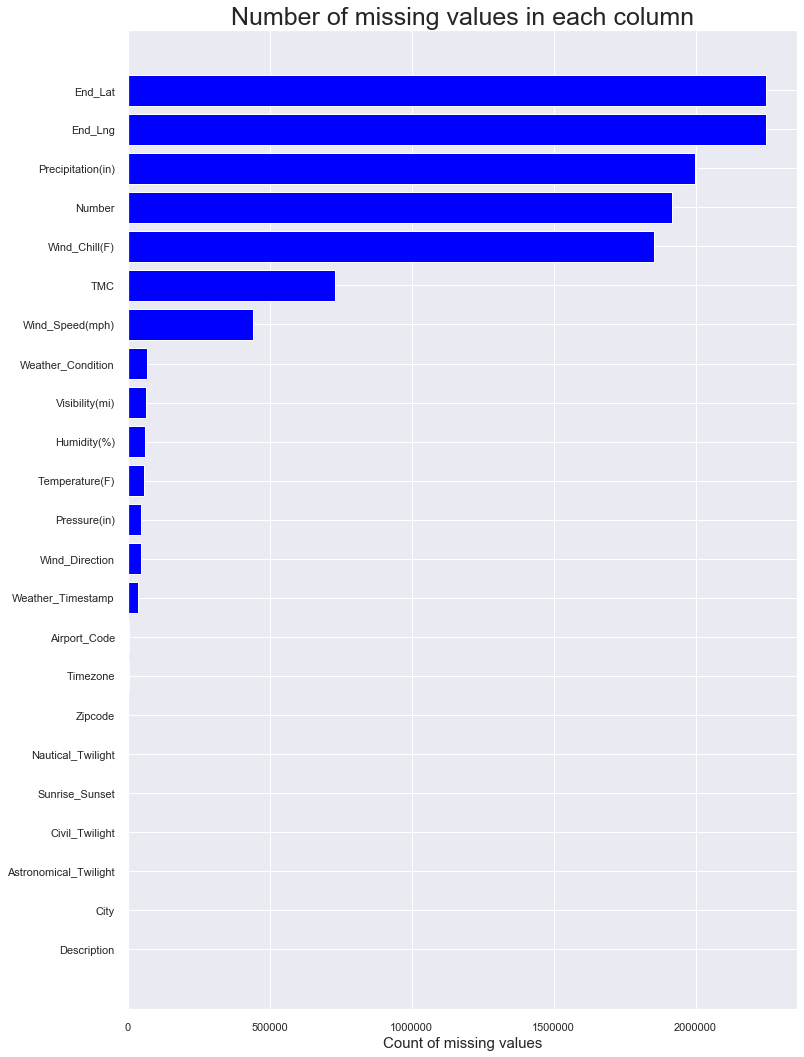

In [8]:
# Look for missing data and plot values for visuals
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values",fontsize=axisFont)
ax.set_title("Number of missing values in each column",fontsize=titleFont)
plt.show()

The visualization above confirms the information in Table 1. The columns: End_Lat, End_Long, Precipitation, Number, Wind Chill, TMC and Wind Speed all contain a large amount of missing data. 

Digging a bit deeper into this missing data will provide an indication and additional verification of how much data is missing. Build out a table listing the missing values and look for items with over 15% of the data missing. 

In [9]:
#Get table listing of missing values. Look for items over 15%
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.15]

,columns_name,missing_count,missing_ratio
2,TMC,728071,0.244784
8,End_Lat,2246264,0.755216
9,End_Lng,2246264,0.755216
12,Number,1917605,0.644717
24,Wind_Chill(F),1852623,0.622870
30,Precipitation(in),1998358,0.671867


The additional confirmation of these missing data items continues to match all the previous analysis. Given the high percentage of missing data in many of these fields it seems more beneficial to remove them from the analysis than to impute the data. The following actions will be taken on the data columns:

- End_Lat - remove due to high percentage of data missing
- End_Log - remove due to high percentage of data missing
- Number - remove due to high percentage of data missing
- TMC - remove due to high percententage of data missing
- Wind_Chill(F) - keep and inpute the required values
- Precipitation(in) - keep and inpute the required values


Begin building a list of the columns to be removed from the data set.

In [10]:
#build a list of columns to remove based on the missing ratio data above. Keep Wind_Chill and Precipitation
missing = missing_df.loc[missing_df['missing_ratio']>0.15]
removelist = missing['columns_name'].tolist()

#List columns to keep
keep_columns = {'Wind_Chill(F)', 'Precipitation(in)'} 
  
removelist = [ele for ele in removelist if ele not in keep_columns] 
removelist

['TMC', 'End_Lat', 'End_Lng', 'Number']

Now that columns have been analyzed for missing values, let's move on to evaluate other columns that may need to be removed or cleaned up due lack of uniqueness of data or data inconsistencies. Continue to build the list of fields to be removed and correct data as we progress through the analysis

In [11]:
df.nunique()

ID                       2974335
Source                         3
TMC                           21
Severity                       4
Start_Time               2743101
End_Time                 2761499
Start_Lat                1002359
Start_Lng                 985099
End_Lat                   298605
End_Lng                   302906
Distance(mi)               12847
Description              1597506
Number                     37398
Street                    160715
Side                           3
City                       11685
County                      1713
State                         49
Zipcode                   377152
Country                        1
Timezone                       4
Airport_Code                1995
Weather_Timestamp         470781
Temperature(F)               827
Wind_Chill(F)                971
Humidity(%)                  100
Pressure(in)                 994
Visibility(mi)                81
Wind_Direction                24
Wind_Speed(mph)              147
Precipitat

From the information above the following fields need further investigation to determine removal or cleanup:
- Wind_Direction
- Source
- Description
- ZipCode
- Weather Timestamp

In [12]:
#Add items to the remove list
#Look at the sources
df.Source.unique()

#There are only three sources and they more than likley have no bearing on analysis. Add them to the remove list
removelist.append('Source')

#The description field is largely text descriptors of the accidents based on the overall data description. 
removelist.append('Description')

#The weather timestamp is just timing for when the weather report was used. Seems to not have value for analysis
removelist.append('Weather_Timestamp')

#The street field is another field for removal. Focus is more at city/county/state level
removelist.append('Street')

#verify fields were added to the list
removelist

['TMC',
 'End_Lat',
 'End_Lng',
 'Number',
 'Source',
 'Description',
 'Weather_Timestamp',
 'Street']

In [13]:
#clean up inconsistencies in the data. 
#Make the wind direction values consistent. Look at the values to determine uniqueness.
print(df.Wind_Direction.unique())
df.Wind_Direction = df.Wind_Direction.replace('South','S')
df.Wind_Direction = df.Wind_Direction.replace('North','N')
df.Wind_Direction = df.Wind_Direction.replace('West','W')
df.Wind_Direction = df.Wind_Direction.replace('East','E')
df.Wind_Direction = df.Wind_Direction.replace('Variable','VAR')
(print(df.Wind_Direction.unique()))

#Zipcodes are a mix of 5-digit and Zip+4 values. Go ahead and make them all 5-digit zipcodes to consistency
df.Zipcode = df.Zipcode.str.slice(0,5,1)

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'W' 'NNW' 'NNE' 'S' 'N' 'VAR' 'SE'
 'SSE' 'ESE' 'E' 'NE' 'ENE' nan 'CALM']


Wind Direction and Zipcode values are now constent

For better data understanding we also want to rename some columns that may be confusing specifically:

- Amenity - this will be renamed PointOfInterest to better reflect what it is
- Give_Way - this will be renamed to Yield

In [14]:
#Convert column names as described above and verify
df.rename(columns={'Amenity':'PointOfInterest'},inplace=True)
df.rename(columns={'Give_Way':'Yield'},inplace=True)
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

Now that all fields have been corrected and columns also identified for removal, proceed with removal of the data fields and verify the shape to show they were dropped

In [15]:
#drop the columns identified with limited data
df.drop(removelist,1,inplace=True)

#check the data shape
df.shape

(2974335, 41)

The shape call above confirms that the 7 columns identified have been dropped. 

Now that the data is relatively clean, let's add a additional columns to help with further data visualizations. Perform the follwing tasks:

- break the accident start time into component parts of year, month, day, hour, minute, second
- break the accident end time into component parts of year, month, day, hous, minute, second
- create a new feature for accident duration

In [16]:
#Add additional features for breaking apart time for EDA
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday for Start values
df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract year, month, day, hour and weekday for End values
df['End_Year']=df['End_Time'].dt.year
df['End_Month']=df['End_Time'].dt.strftime('%b')
df['End_Day']=df['End_Time'].dt.day
df['End_Hour']=df['End_Time'].dt.hour
df['End_Weekday']=df['End_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
df['Time_Duration(min)']=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

## Sample Statistics - 10 pts

## Visualizations - 15 pts

In this section we will visualize the data to determine what key insights can be determined quickly from the data.

Look at state accident rates:

### Number of Accidents by State

The accidents rates by state show that California (CA) has the highest number of accidents within the data set. The plot show the magnititued of this difference when compared to other states. The data also show that two of the largest states, California and Texas, have the highest accidents rates. This makes sense as the number of accidents by states possibly correlates to the state population. At the tails of the data this correlation is high: California and Texas have the highest poopulations and the Dakota's have lower populations. Additional analysis would need to be performed to ensure the correlation was seen throughout all the data points.

Text(0, 0.5, 'Number of Accidents')

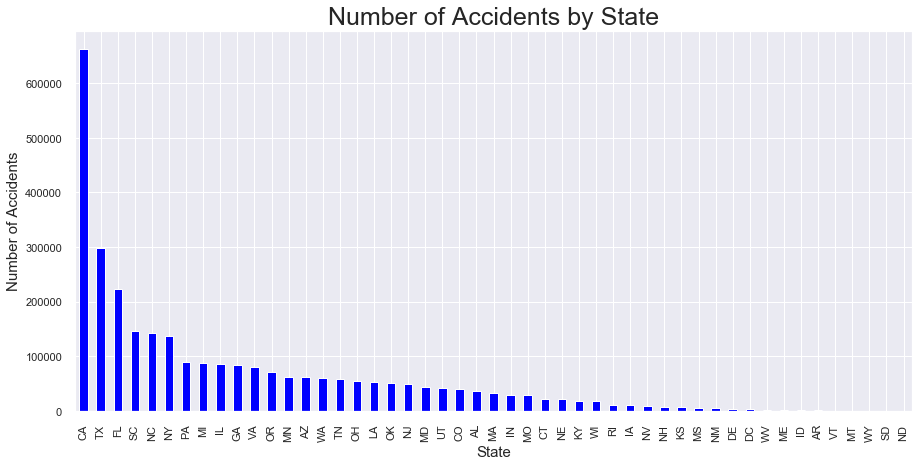

In [17]:
#plot states with accident rates. CA is highest
plt.figure(figsize=(15,7))
df.State.value_counts().plot(kind='bar',color='blue')
plt.title('Number of Accidents by State',fontsize=titleFont)
plt.xlabel('State',fontsize=axisFont)
plt.ylabel('Number of Accidents',fontsize=axisFont)

### Frequency of Accident Occurrence by Month

Viewing accident occurrence by month we see that the occurrence of accidents seems to increase over the year. The fourth quarter of the year (October, November, December) have the highest accident occurrences. Factors that could influence this could be the higher number of individuals travelling due to the holidays, higher number of people driving due to vacations, or even higher fatigue due to it being later in the year. These possibilities should be further investigated to see if any additional insight is gleemed.

Text(0, 0.5, 'Number of Accidents')

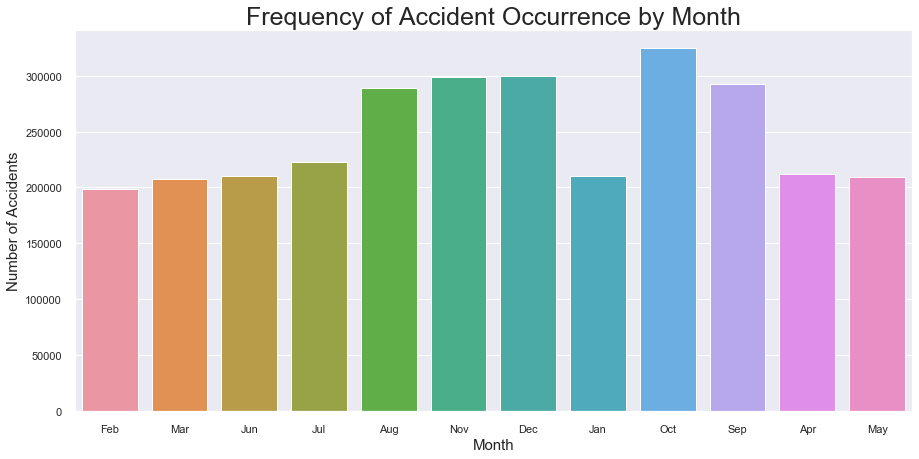

In [39]:
#Plot when most accidents occur. Most occur between 7-9 AM
plt.figure(figsize=(15,7))
sns.countplot(df.Start_Month)
plt.title('Frequency of Accident Occurrence by Month',fontsize=titleFont)
plt.xlabel('Month',fontsize=axisFont)
plt.ylabel('Number of Accidents', fontsize=axisFont)

### Frequency of Accident Occurrence by Day

Viewing accident occurrence by day we see that fewer accidents occur on the weekend than during weekdays. We also see a higher occurrence of accidents on Tuesday and Friday when compared to other days of the week.

Text(0, 0.5, 'Number of Accidents')

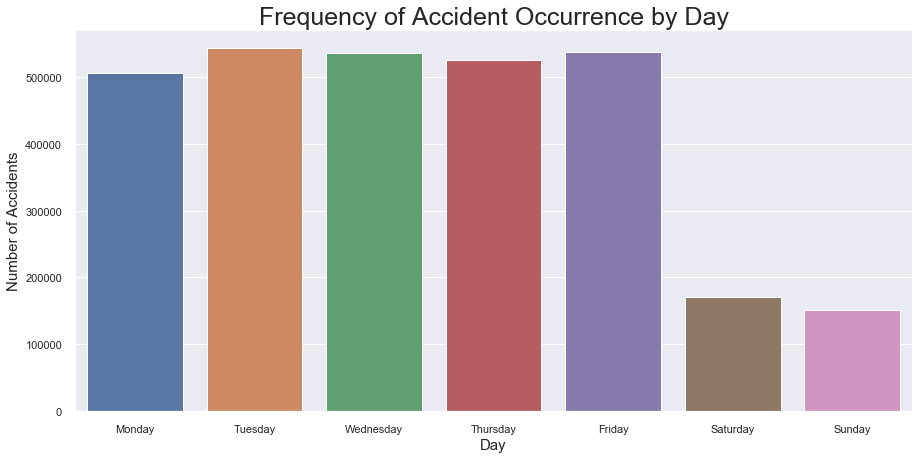

In [38]:
#Plot when most accidents occur. Most occur between 7-9 AM
plt.figure(figsize=(15,7))
sns.countplot(pd.to_datetime(df.Start_Time).dt.day_name())
plt.title('Frequency of Accident Occurrence by Day',fontsize=titleFont)
plt.xlabel('Day',fontsize=axisFont)
plt.ylabel('Number of Accidents', fontsize=axisFont)

### Frequency of Accident Occurrence by Hour of Day

Accident rates by hour of the day show that the most accidents occur between the rush hour periods (7-9AM and 4-7PM respectively). Based on the data most accidents tend to occur during the morning rush hour period. The data also show that during the late evening and early morning hours accidents occur less frequently. 

Text(0, 0.5, 'Number of Accidents')

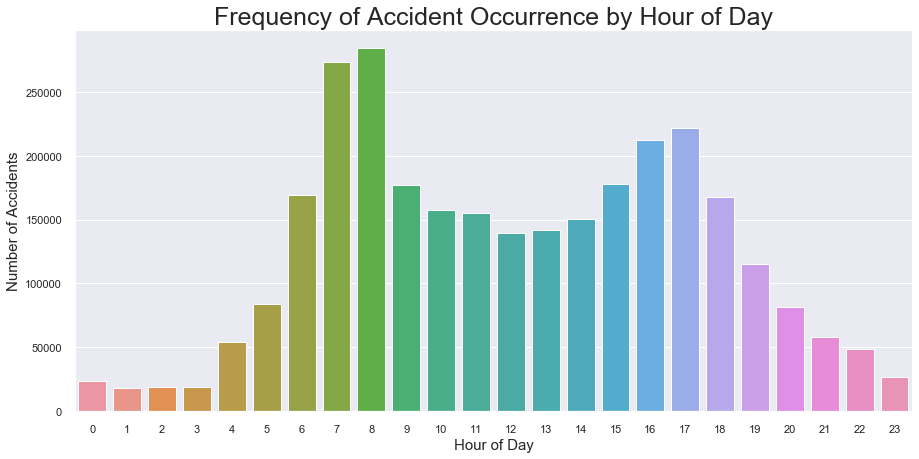

In [19]:
#Plot when most accidents occur. Most occur between 7-9 AM
plt.figure(figsize=(15,7))
sns.countplot(df.Start_Hour)
plt.title('Frequency of Accident Occurrence by Hour of Day',fontsize=titleFont)
plt.xlabel('Hour of Day',fontsize=axisFont)
plt.ylabel('Number of Accidents', fontsize=axisFont)

### Weather Conditions for Accidents

The plot below shows the top 5 weather conditions that were recorded at the time of an accident. From the plot we see that most accidents occur when weather conditions are clear. This seems intuitive in that drivers may be more cautious while driving in poor weather conditions.

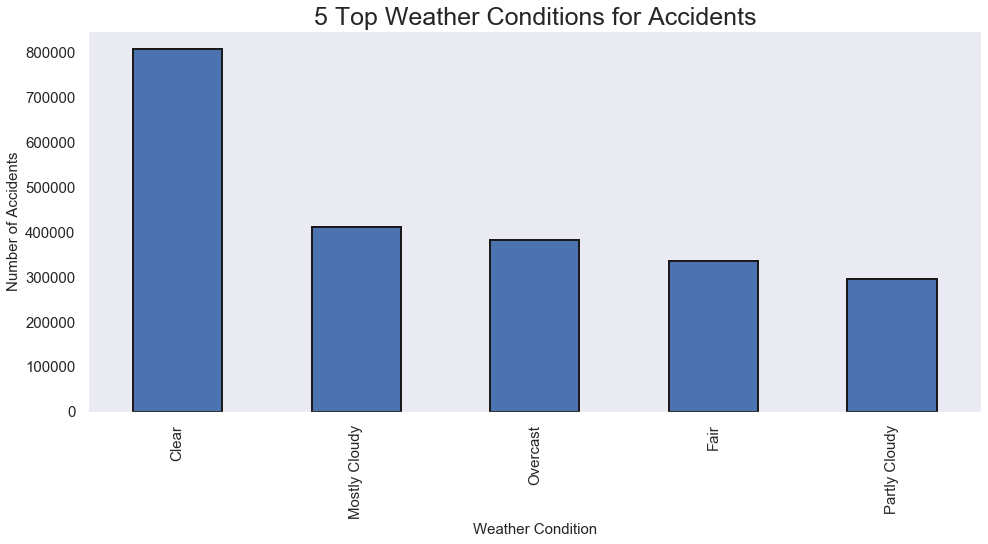

In [20]:
#Plot top weather conditions for accidents. Most accidents occur on clear days
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather Condition',fontsize=axisFont)
plt.ylabel('Number of Accidents',fontsize=axisFont)
ax.tick_params(labelsize=labelFont)
plt.title('5 Top Weather Conditions for Accidents',fontsize=titleFont)
plt.grid()
plt.ioff()

### Accident Severity by State

The plot below shows that the majority of all accidents are classified as Severity 2 or 3 accidents. These severity levels indicate mild traffic impace. The plot also re-confirms the analysis of where most accidents occur. Except in a few cases (notabily Georgia) we see that there are more Severity 2 accidents in the states over all than Severity 3 accidents. 

Text(0, 0.5, 'Accident Severity Count')

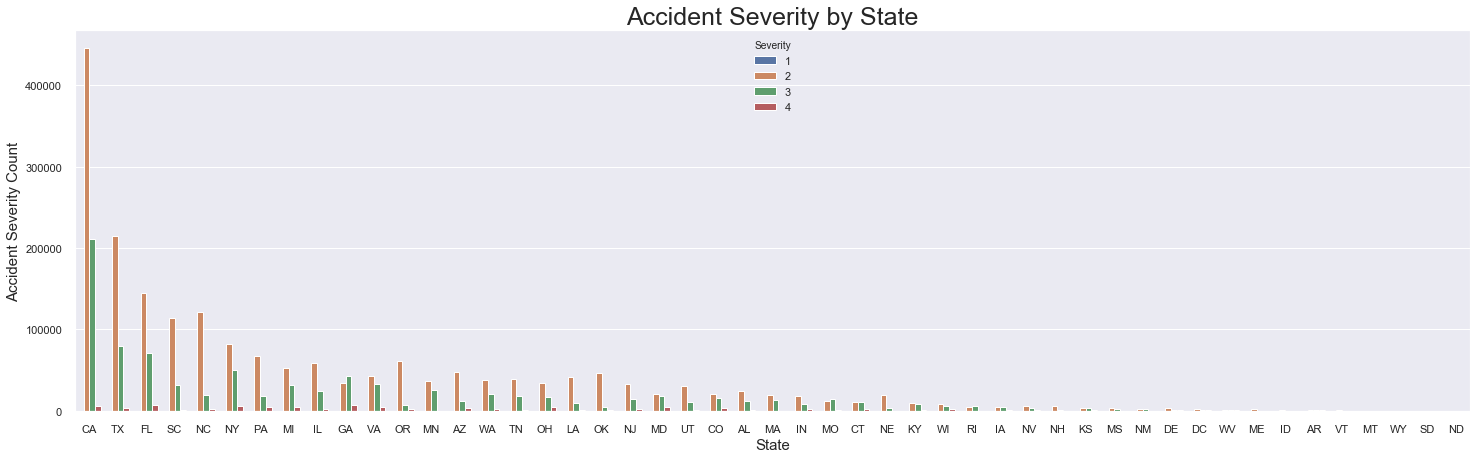

In [21]:
#Plot accidents based on severity categorizations. Sev 2/3 most prevalent in each state.
#Should look further
plt.figure(figsize=(25,7))
sns.countplot(df.State,hue=df.Severity,order = df.State.value_counts().index)
plt.title('Accident Severity by State', fontsize=titleFont)
plt.xlabel('State', fontsize=axisFont)
plt.ylabel('Accident Severity Count', fontsize=axisFont)

### Accident Severity by Weather Conditions

The plot below is a re-affirmation that Severity levels 1 and 2 are the most prevalent accident types and that the majority of these accidents occur during clear weather conditions. Although seeming duplicative of previous plots one interesting item has stood out in this plot: There are more severity 4 accidents on clear days as well. This is the first time this pattern of Severity 4 accidents has shown.

Text(0, 0.5, 'Weather Condition')

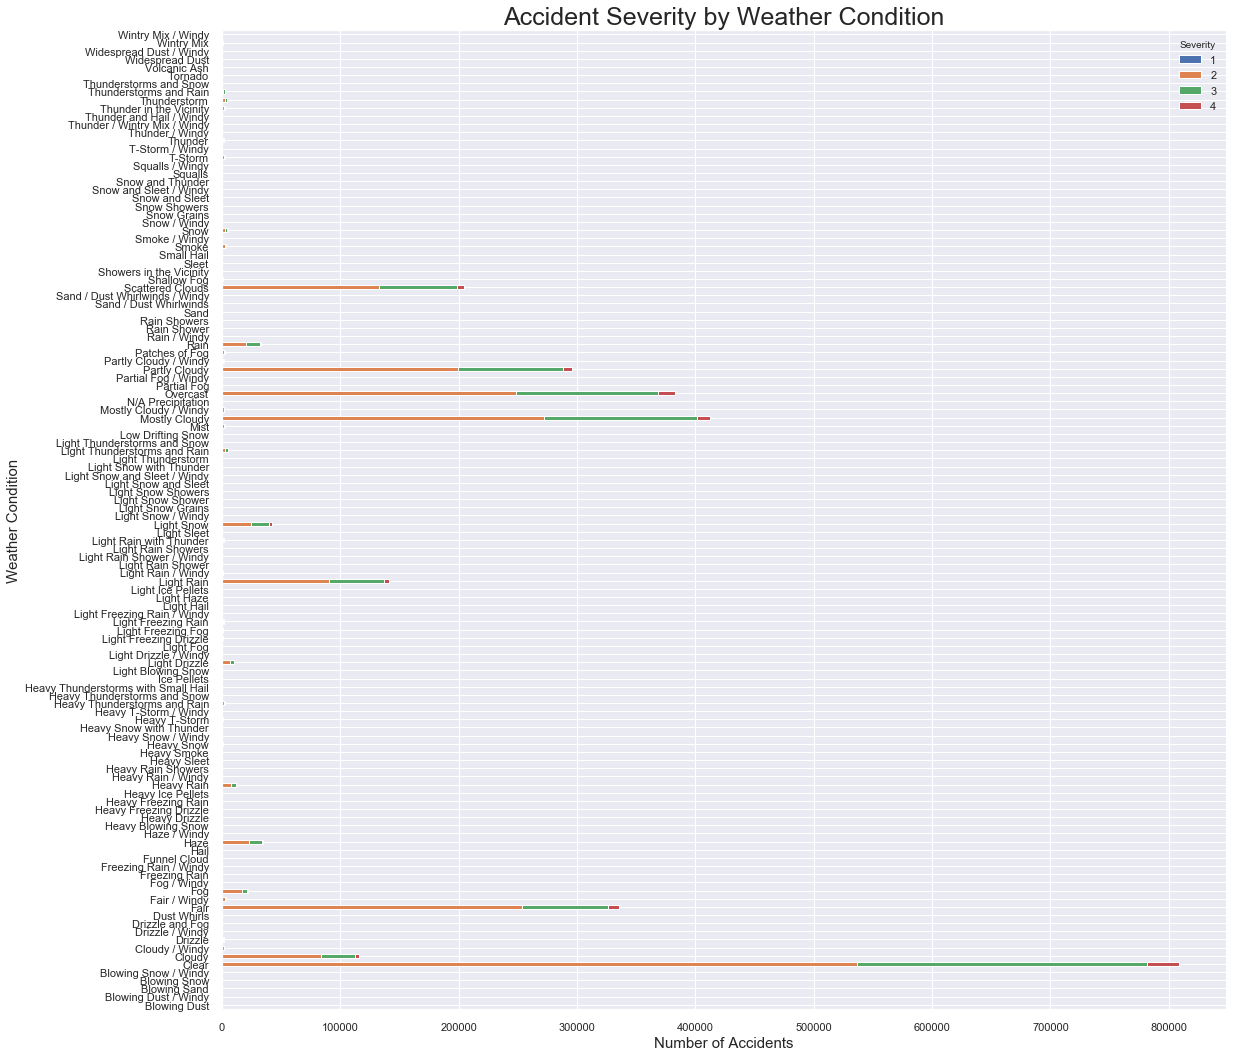

In [22]:
display(HTML("<style>div.output_scroll { height: 65em; }</style>"))
plt.rcParams['figure.figsize'] = [18, 18]

# State and severity bar chart
df_bar = pd.crosstab(index=df['Weather_Condition'], columns=df['Severity'])

df_bar.plot(kind='barh', stacked=True)
plt.title('Accident Severity by Weather Condition', fontsize=titleFont)
plt.xlabel('Number of Accidents', fontsize=axisFont)
plt.ylabel('Weather Condition', fontsize=axisFont)

### Time to Clear Accidents

The plot below shows the time it takes to clear an accident and get traffic fully flowing again. As shown in the plot, it frequently only takes one hour for accidents to be cleared before traffic is flowing. 

Text(0, 0.5, 'Number of Accidents')

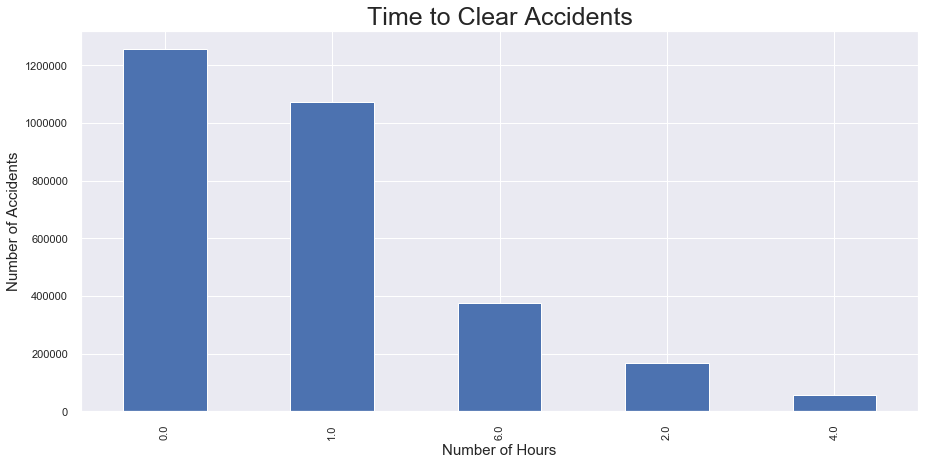

In [23]:
#plot length it takes to clear an accident. Looks like about 1 hour most frequently
plt.figure(figsize=(15,7))
round((df['Time_Duration(min)']/60),0).value_counts().head().plot(kind='bar',color='b')
plt.title('Time to Clear Accidents',fontsize=titleFont)
plt.xlabel('Number of Hours',fontsize=axisFont)
plt.ylabel('Number of Accidents', fontsize=axisFont)

### Additional Visualizations

For additional visualizations of the data the team also built a Power BI dashboard that can be accessed at: https://app.powerbi.com/view?r=eyJrIjoiZWE4NjllMWEtZTA5YS00MGY0LWIxYzEtNzFjYWE0NGUwNjFkIiwidCI6IjFlZmEzZTljLTY1ZWItNGM5Ny05ZjZiLTQxNWViZGYwOTI1OCIsImMiOjN9

## Attribute Relationships - 15 pts

The following section looks at attribute relationships that could be beneficial in model development

### Distance versus Temperature:

Most of the observed accidents occur when distances are low and temperature is within the range of 0 to 100 degrees Farenheit. It goes without saying that this temperature range is 1) very wide, and 2) encompasses the "normal" range of temperatures within the U.S. 

Interestingly, we do observe a slightly higher incidence of the most severe accidents within the range of 0 to approximately 40 degrees, possibly attributable to freezing conditions such as ice and/or snow. It will be interesting to correlate this finding alongside our weather description field to see if we observe higher severe accidents when these conditions are present. 

Additionally if we look at the distance axis with the most severe accidents in mind, a pattern starts to emerge that the most severe accidents generally occur under 50 miles distance.

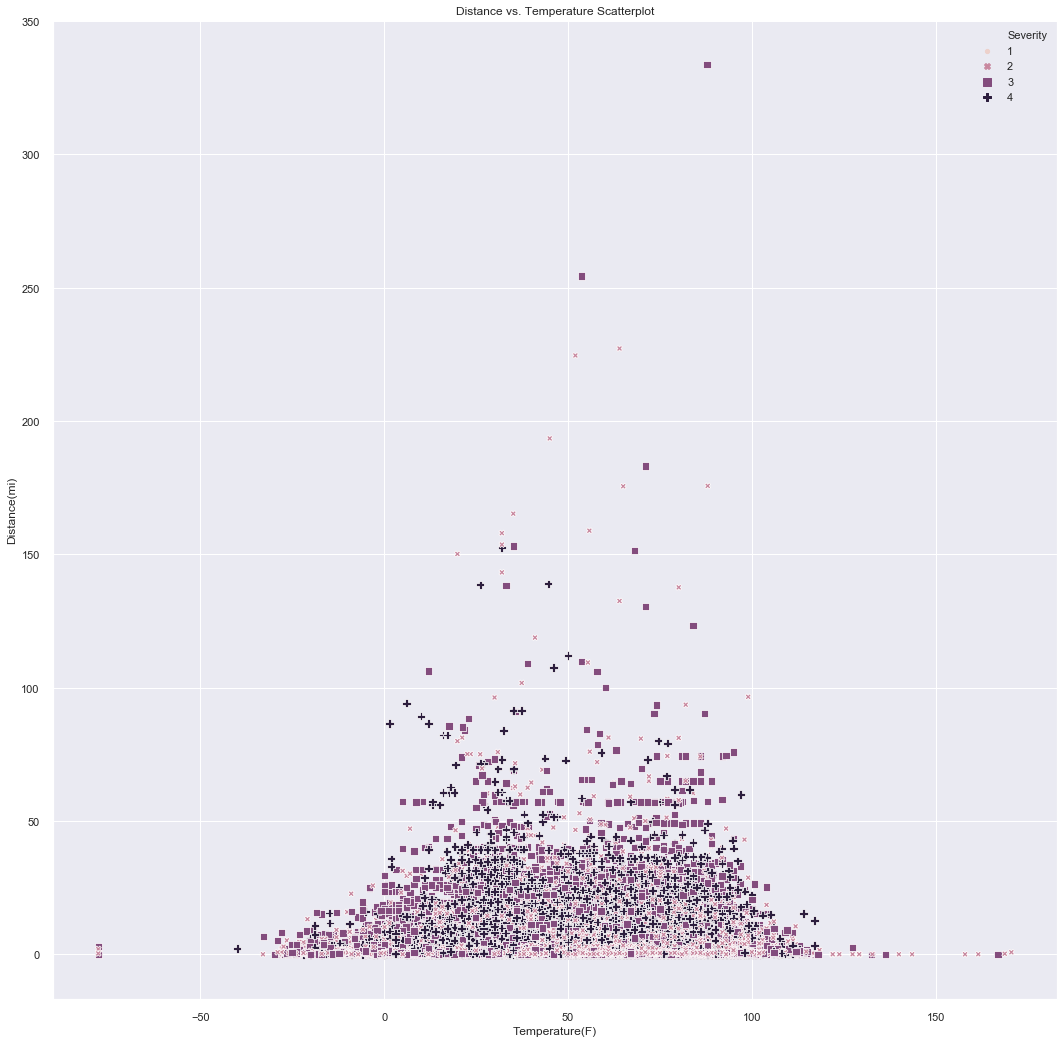

In [24]:
#Scatter plot - Temp vs. Distance

plt.title('Distance vs. Temperature Scatterplot')
sns.scatterplot(x='Temperature(F)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

### Distance versus Visibility:

When visibility is lowest, we see larger distances driven and a higher frequency of accidents. It follows that the reduced visibility then may be partly to blame for the higher accident rate we've observed. The severity of these accidents are also a mixed bag - from least severe to most severe.

Conversely, when visibility increases, we see distances decrease. We also see less severe accidents occuring, save for a handful of severity level 3 accidents around the 110 mile mark. Higher visibility then appears to have some correlation with a lower accident rate.

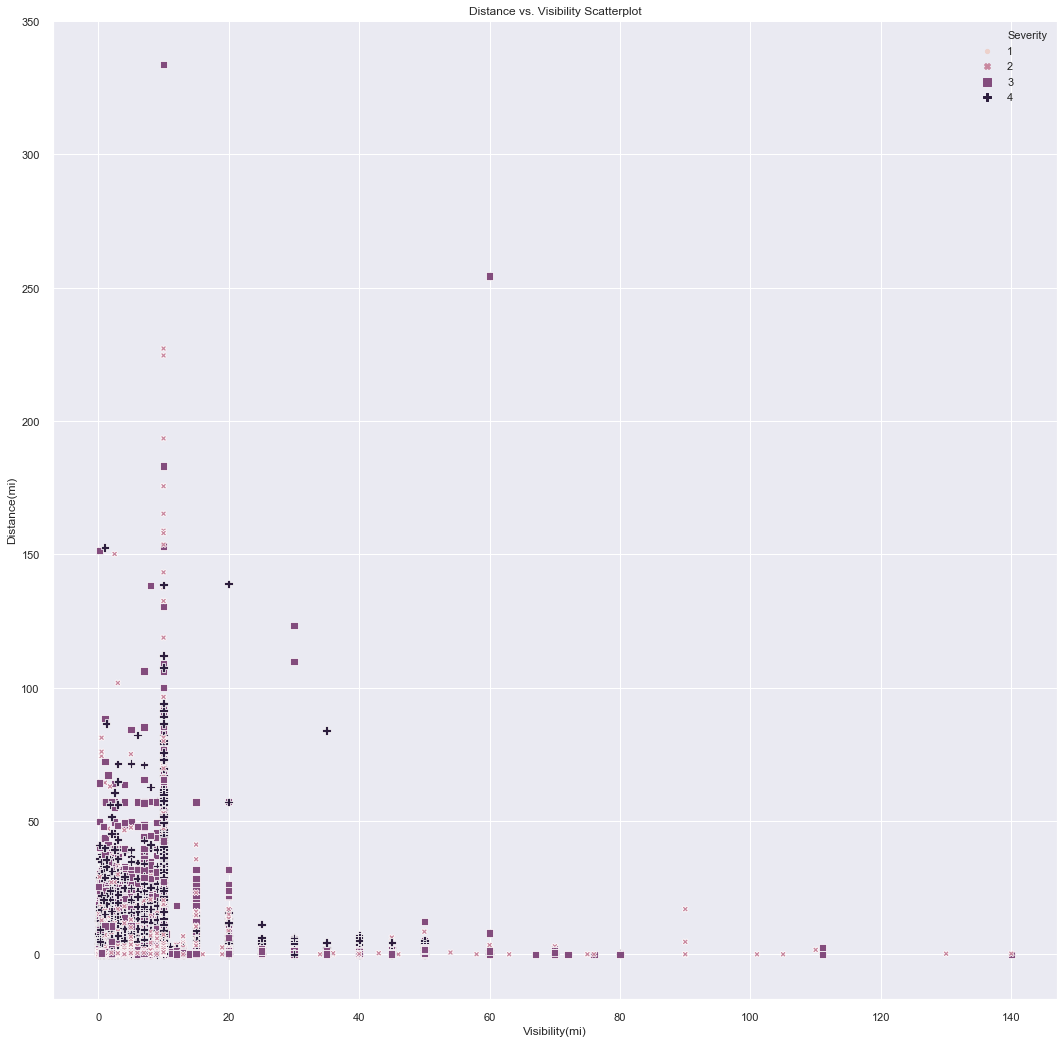

In [25]:
# Scatter plot - Visibility vs. Temperature

plt.title('Distance vs. Visibility Scatterplot')
sns.scatterplot(x='Visibility(mi)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

### Visibility vs. Temperature:

As with our previous observations, most accidents tend to occur when lower visibility conditions are present. As visibility conditions improve, both the accident rate and severity of those accidents appears to also improve. 

If we layer temperature into the plot alongside visibility, there does not appear to be a clear impact temperature has alongside visibility with respect to accident rate or severity.

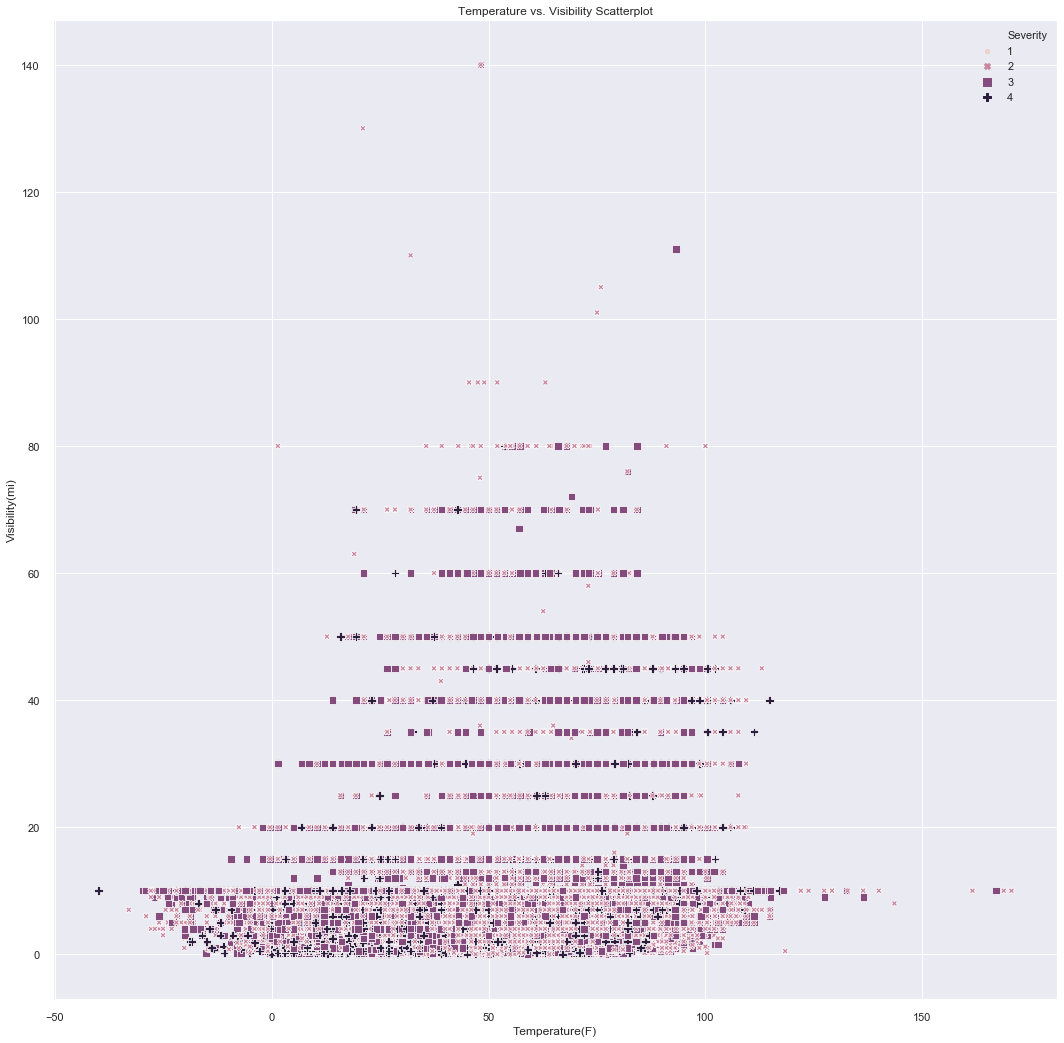

In [26]:
#Scatter plot - Temperature vs. Visibility

plt.title('Temperature vs. Visibility Scatterplot')
sns.scatterplot(x='Temperature(F)', y='Visibility(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Precipitation versus Visibility

Most accidents appear to cluster between 0 and 5 inches of precipitation and lower levels of visibility. 

As we saw in previous scatterplots, as visibility increases, the accident rate tends to decrease. As precipitation increases however, accident frequency also increases but to a point (approximately at 5 inches of precipitation - and again around 10 inches). There appears to be a gap between 5 and 10 inches of precipitation at lower visibility levels. There is also a clustering of accidents right around the 10 inch precipitation mark with lower visibility associated as well. 

As with our previous visibility scatterplot, the most severe accidents appear to occur at lower levels of visibility 

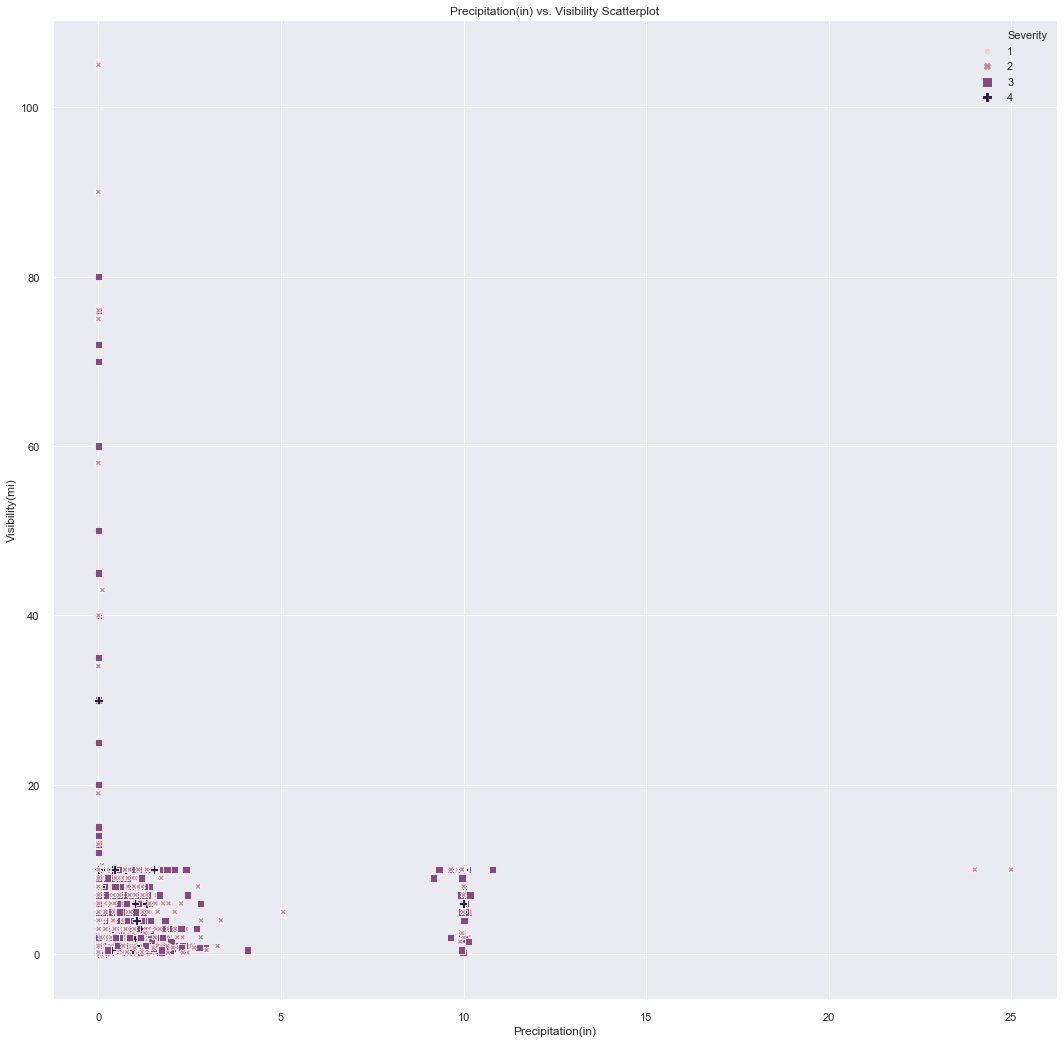

In [27]:
#Scatter plot - Precipitation vs. Visibility

plt.title('Precipitation(in) vs. Visibility Scatterplot')
sns.scatterplot(x='Precipitation(in)', y='Visibility(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Precipitation versus Distance

As precipitation increases, distance does not appear to follow. In fact, most accidents tend to occur within relatively small distances and low precipitation, save for one cluster of accidents that occur when precipitation reaches 10 inches - with distance still remaining relatively low. 

At lower levels of precipitation however, we observe crashes occuring at longer distances - likely attributable to more driving activity when conditions are better. The most severe accidents tend to occur within 50 miles and with 0 - 4 inches of precipitation.

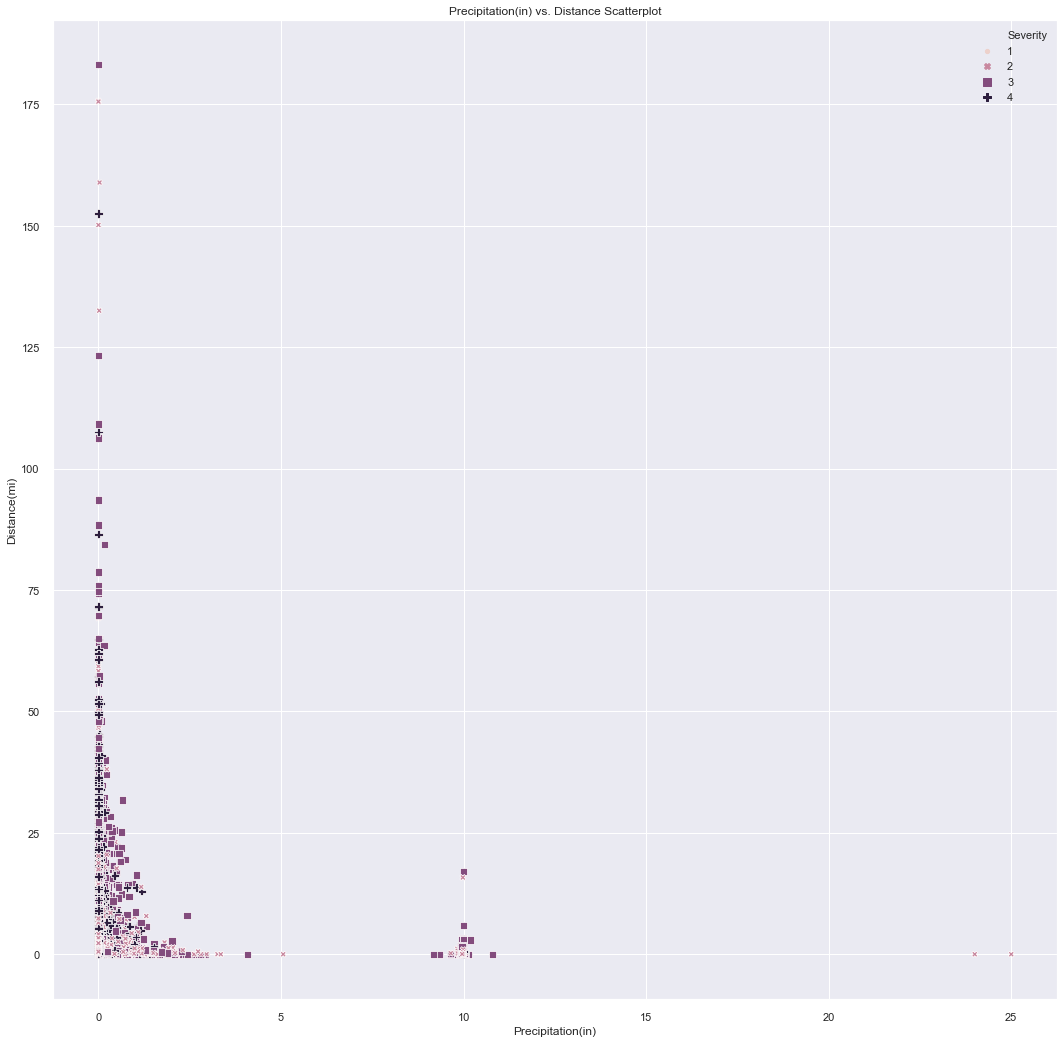

In [28]:
#Scatter plot - Precipitation vs. Distance

plt.title('Precipitation(in) vs. Distance Scatterplot')
sns.scatterplot(x='Precipitation(in)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Visibility versus Distance

As visibility increases, distance driven does as well - to a point. At around the 15 miles of visibility marker, distance driven tends to decrease. What we may be seeing here is that visibility past a certain point - say 15-20 miles, makes no difference to the everyday driver in terms of the distance they cover as either of those conditions present excellent driving conditions. 

What is interesting is the 0-15 mile visibility range; we see accidents steadily increase as we approach the 15 mile visibility mark. This increase parallels the distance increase as well - potentially indicating that as visibility conditions improve up to around 15 miles of visibility, so too does the distance driven and the associated increase in accidents.

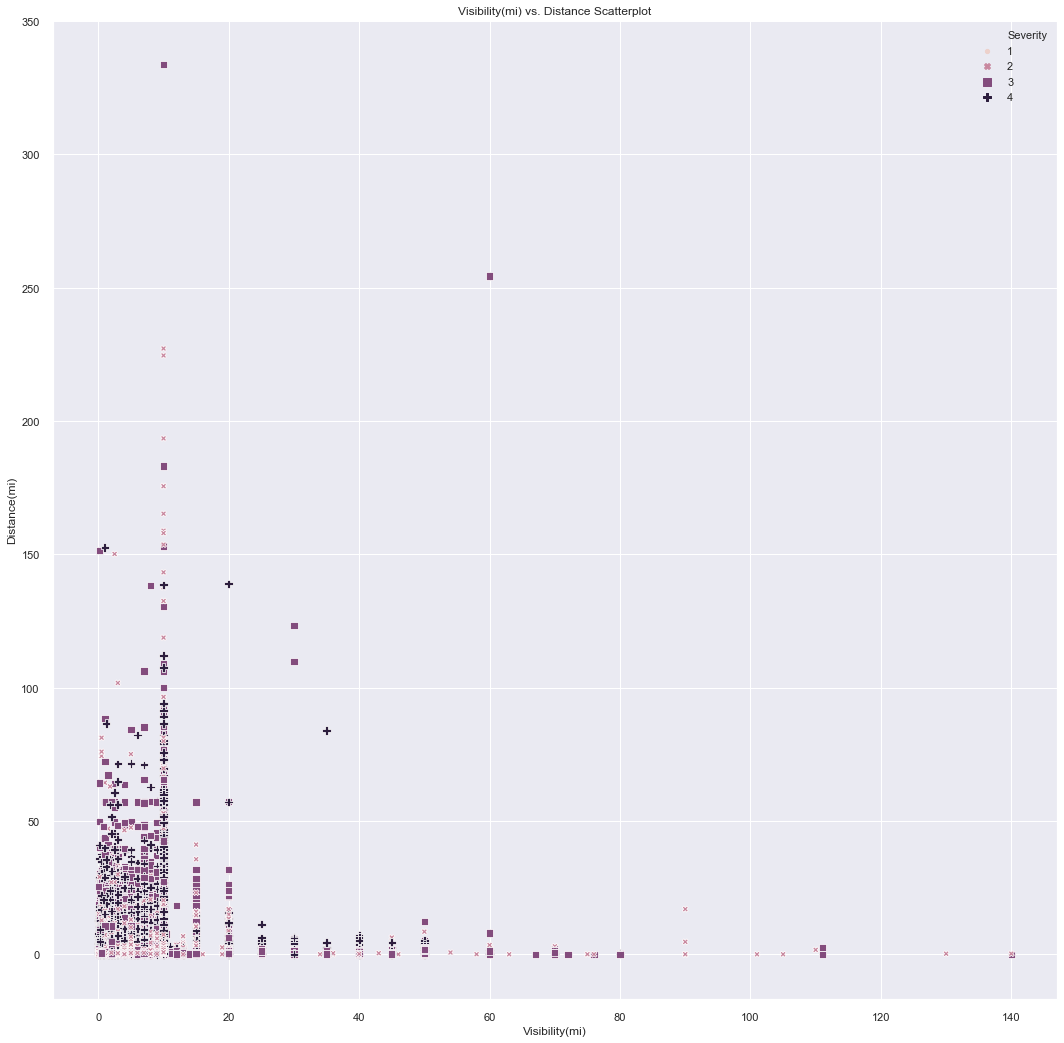

In [29]:
#Scatter plot - Visibility vs. Distance

plt.title('Visibility(mi) vs. Distance Scatterplot')
sns.scatterplot(x='Visibility(mi)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Pressure versus Distance

When pressure is highest, driving distance seems to also be highest - potentially indicating that folks drive further when higher pressure systems exist (usually resulting in clearer driving weather). 

We also see a clustering of accidents on the lower side of the pressure range with a lower distance as well - indicating potentially that when pressure is low (as it usually is in storm conditions), people generally drive less. Whatsmore, there appears to be a clustering of more severe accidents in this space potentially due to weather.

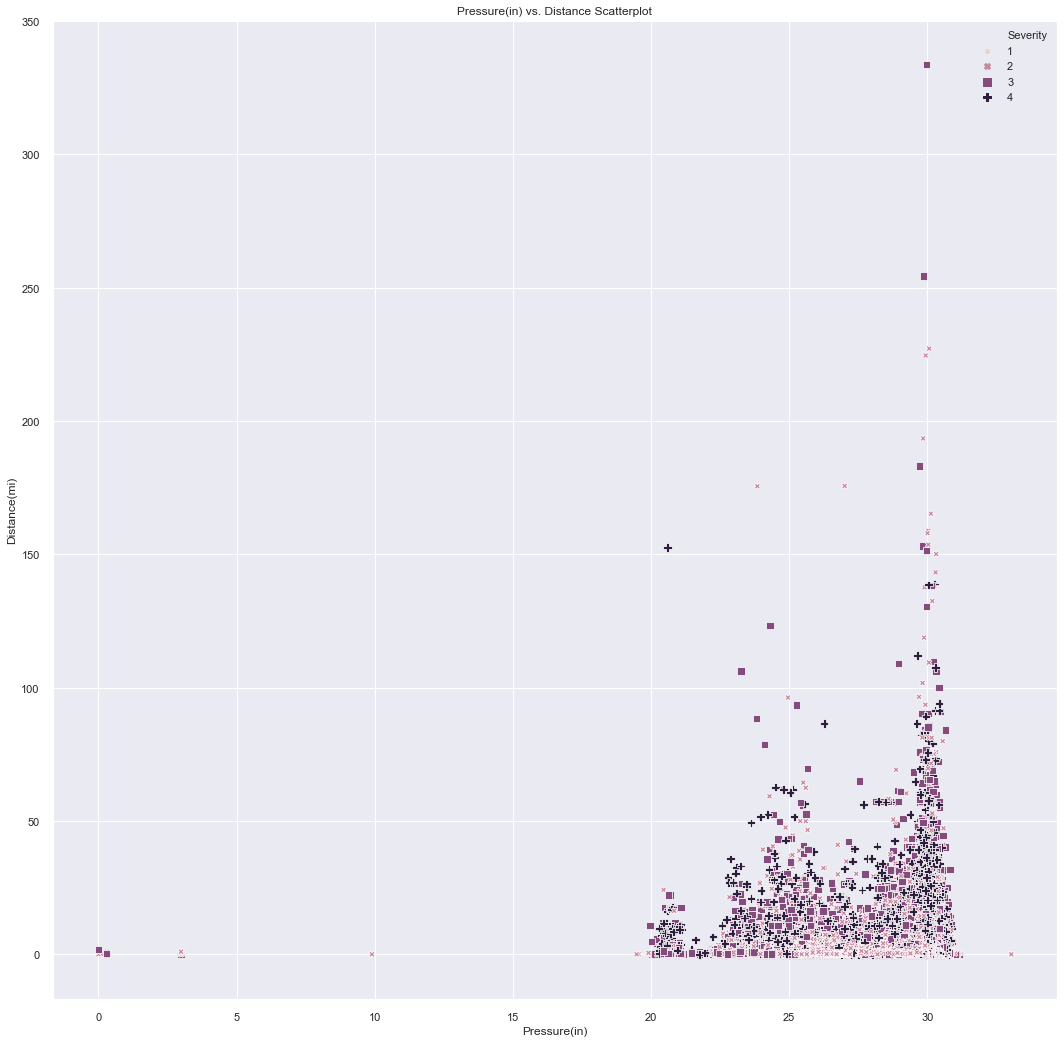

In [30]:
#Scatter plot - Pressure vs. Distance

plt.title('Pressure(in) vs. Distance Scatterplot')
sns.scatterplot(x='Pressure(in)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Humidity vs. Distance

There doesn't appear to be any strong correlation or insight from the combination of humidity, distance, and accident severity.

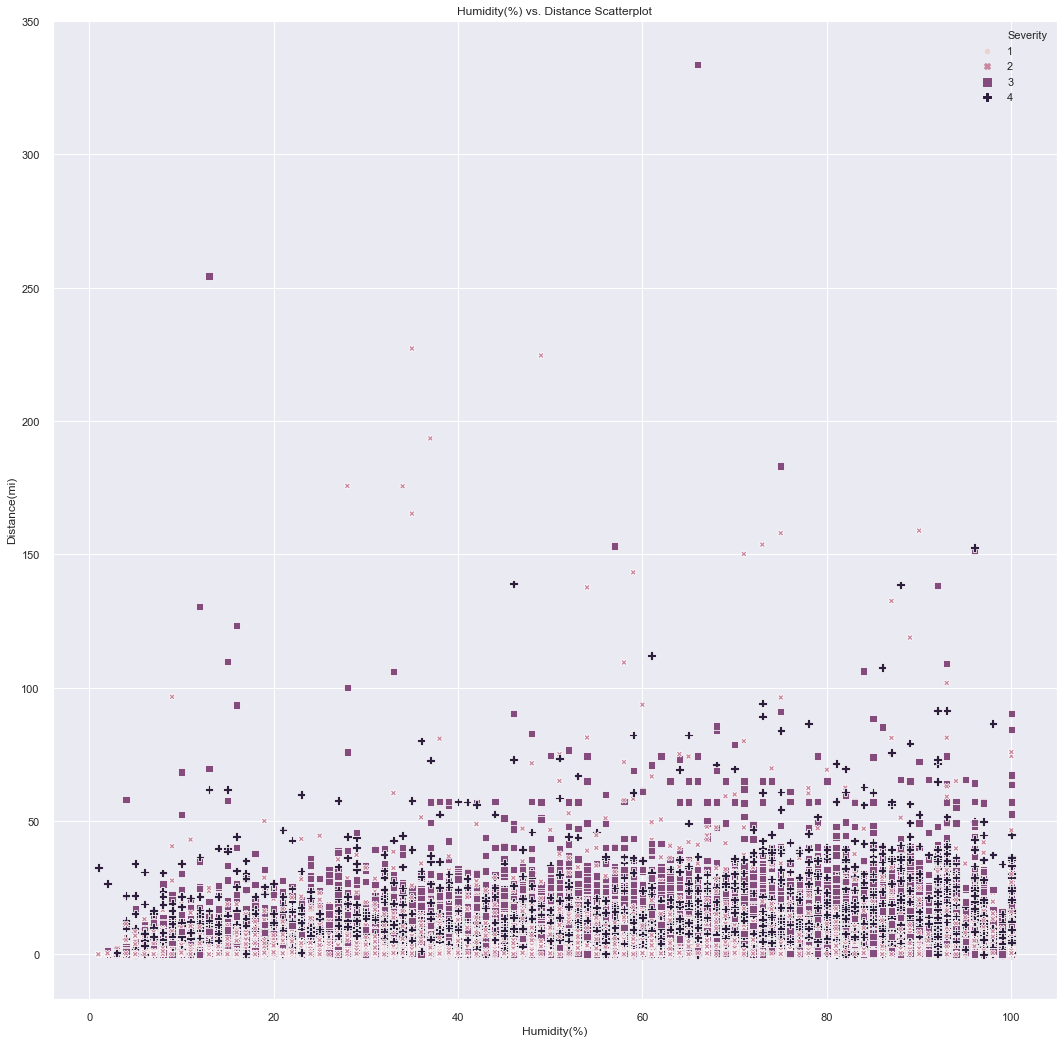

In [31]:
#Scatter plot - Humidity vs. Distance

plt.title('Humidity(%) vs. Distance Scatterplot')
sns.scatterplot(x='Humidity(%)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Humidity vs. Temperature

There's a clear association between rising temperature and falling humidity; said another way, as humidity increases temperature seems to decrease which possibly indicates the relationship between higher temperature and lower humidity. This is likely more of a weather-related effect / relationship than any specific finding with the accident data. 

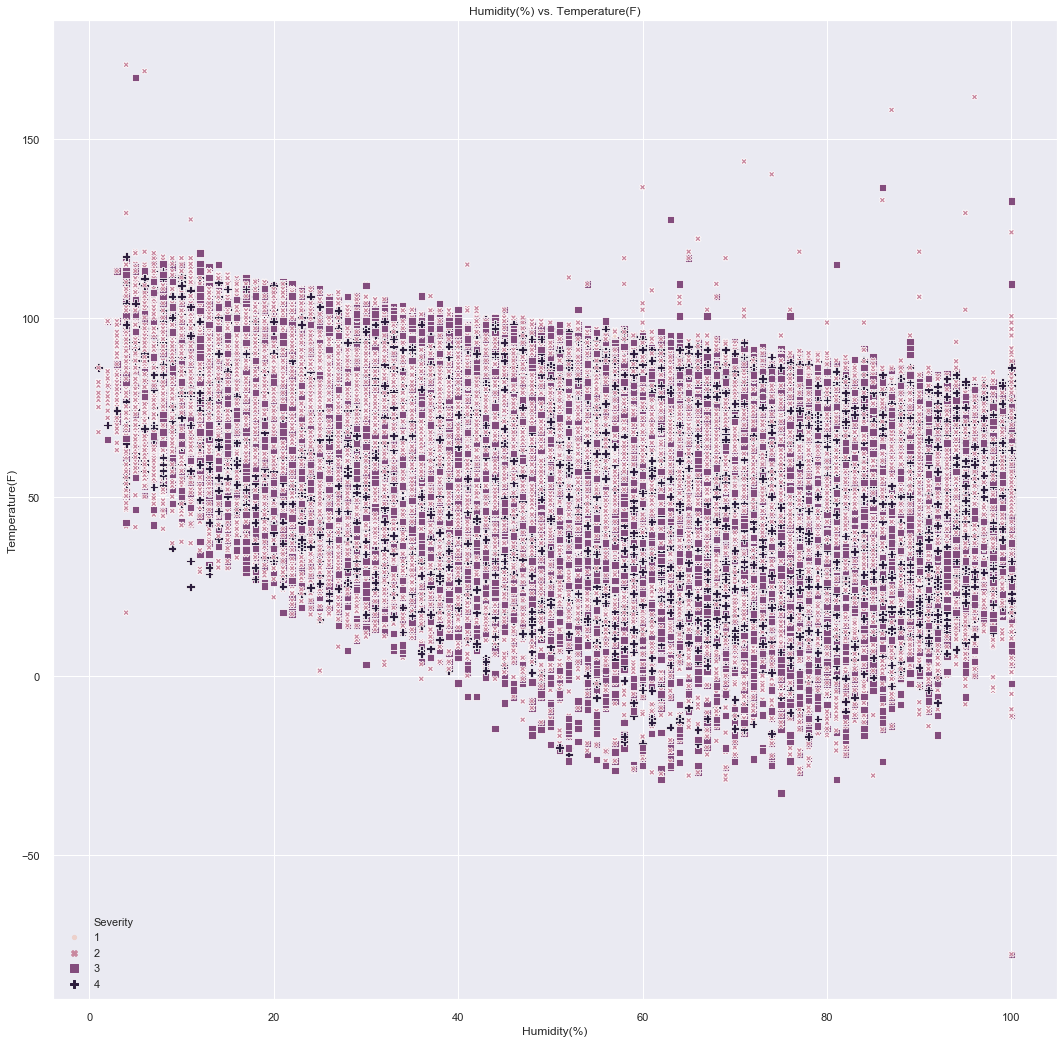

In [32]:
#Scatter plot - Humidity(%) vs. Temperature(F)

plt.title('Humidity(%) vs. Temperature(F)')
sns.scatterplot(x='Humidity(%)', y='Temperature(F)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Association Heatmap

The plot below shows the correlation between factors in the data. 

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Year,Start_Day,Start_Hour,End_Year,End_Day,End_Hour,Time_Duration(min)
Severity,1.000000,0.047138,0.055198,0.146393,-0.029132,-0.079993,0.023188,0.018289,-0.006136,0.030343,0.016632,-0.049221,-0.005455,-0.129030,-0.007847,0.063437,-0.006709,-0.023666,-0.003843,-0.052094,-0.055394,-0.006786,-0.195834,NaN,-0.050269,0.002681,0.024906,-0.050165,0.002829,-0.006963,0.018431
Start_Lat,0.047138,1.000000,-0.013672,0.069151,-0.422737,-0.497549,0.049461,-0.079768,-0.053446,0.052384,0.005187,0.041855,0.003110,-0.018875,-0.001728,0.034507,-0.000012,-0.000383,0.000324,0.005559,0.012996,0.009101,-0.094739,NaN,0.029134,-0.000635,-0.016852,0.029190,-0.000559,-0.017934,0.009183
Start_Lng,0.055198,-0.013672,1.000000,0.040045,-0.068372,-0.191401,0.185338,0.140442,-0.048123,0.069893,0.044698,-0.011217,-0.008461,0.012130,0.015783,-0.058664,-0.003308,-0.025507,0.000243,-0.009206,-0.039732,-0.006420,0.081986,NaN,-0.003773,0.002085,-0.042848,-0.003769,0.002261,-0.028463,0.001713
Distance(mi),0.146393,0.069151,0.040045,1.000000,-0.044638,-0.052012,0.018380,-0.032545,-0.011845,0.015999,0.001109,-0.016870,0.000258,-0.043012,-0.002829,0.032723,-0.002906,-0.012114,-0.001176,-0.022130,-0.011208,-0.001108,-0.069962,NaN,0.009509,-0.000234,-0.000449,0.009564,-0.000140,0.005140,0.016291
Temperature(F),-0.029132,-0.422737,-0.068372,-0.044638,1.000000,0.994869,-0.327122,-0.072190,0.175596,-0.029893,-0.013120,-0.003224,-0.000087,0.028324,-0.000564,-0.007453,0.003662,0.005254,-0.001117,0.006028,0.000616,-0.001611,0.053912,NaN,-0.101582,0.014955,0.208410,-0.101658,0.014750,0.212665,-0.001867
Wind_Chill(F),-0.079993,-0.497549,-0.191401,-0.052012,0.994869,1.000000,-0.308035,-0.235248,0.190564,-0.192466,-0.036659,-0.004191,0.002761,0.029448,-0.000019,-0.015242,0.004638,0.014252,-0.001561,0.000604,0.009800,0.001751,0.040450,NaN,0.485054,0.028513,0.173035,0.484942,0.028008,0.190283,-0.006836
Humidity(%),0.023188,0.049461,0.185338,0.018380,-0.327122,-0.308035,1.000000,0.091434,-0.377845,-0.133499,0.061062,-0.002681,-0.001886,-0.031930,0.003124,-0.006833,-0.008213,-0.001758,0.001553,-0.001934,-0.013217,0.000339,-0.019388,NaN,0.017067,-0.018052,-0.312524,0.017095,-0.018126,-0.306711,-0.000547
Pressure(in),0.018289,-0.079768,0.140442,-0.032545,-0.072190,-0.235248,0.091434,1.000000,-0.020050,0.017755,0.039764,0.010020,-0.005220,-0.012027,0.001191,0.026430,-0.006367,0.008985,0.001737,0.016550,-0.009364,-0.000685,0.006766,NaN,-0.296863,-0.010127,-0.018001,-0.296870,-0.010058,-0.022283,0.000814
Visibility(mi),-0.006136,-0.053446,-0.048123,-0.011845,0.175596,0.190564,-0.377845,-0.020050,1.000000,0.007981,-0.083210,0.005435,0.003847,0.031827,0.004690,0.000221,0.012004,0.002663,0.000036,0.005824,0.005967,0.002633,0.025041,NaN,-0.035372,0.009926,0.093273,-0.035375,0.009966,0.083635,0.000936
Wind_Speed(mph),0.030343,0.052384,0.069893,0.015999,-0.029893,-0.192466,-0.133499,0.017755,0.007981,1.000000,0.026155,-0.004396,0.000233,0.005511,-0.001977,0.010770,0.000688,-0.005383,-0.000951,-0.001140,0.003648,-0.002531,0.010205,NaN,-0.095804,0.014470,0.119598,-0.095804,0.014593,0.124487,0.002371


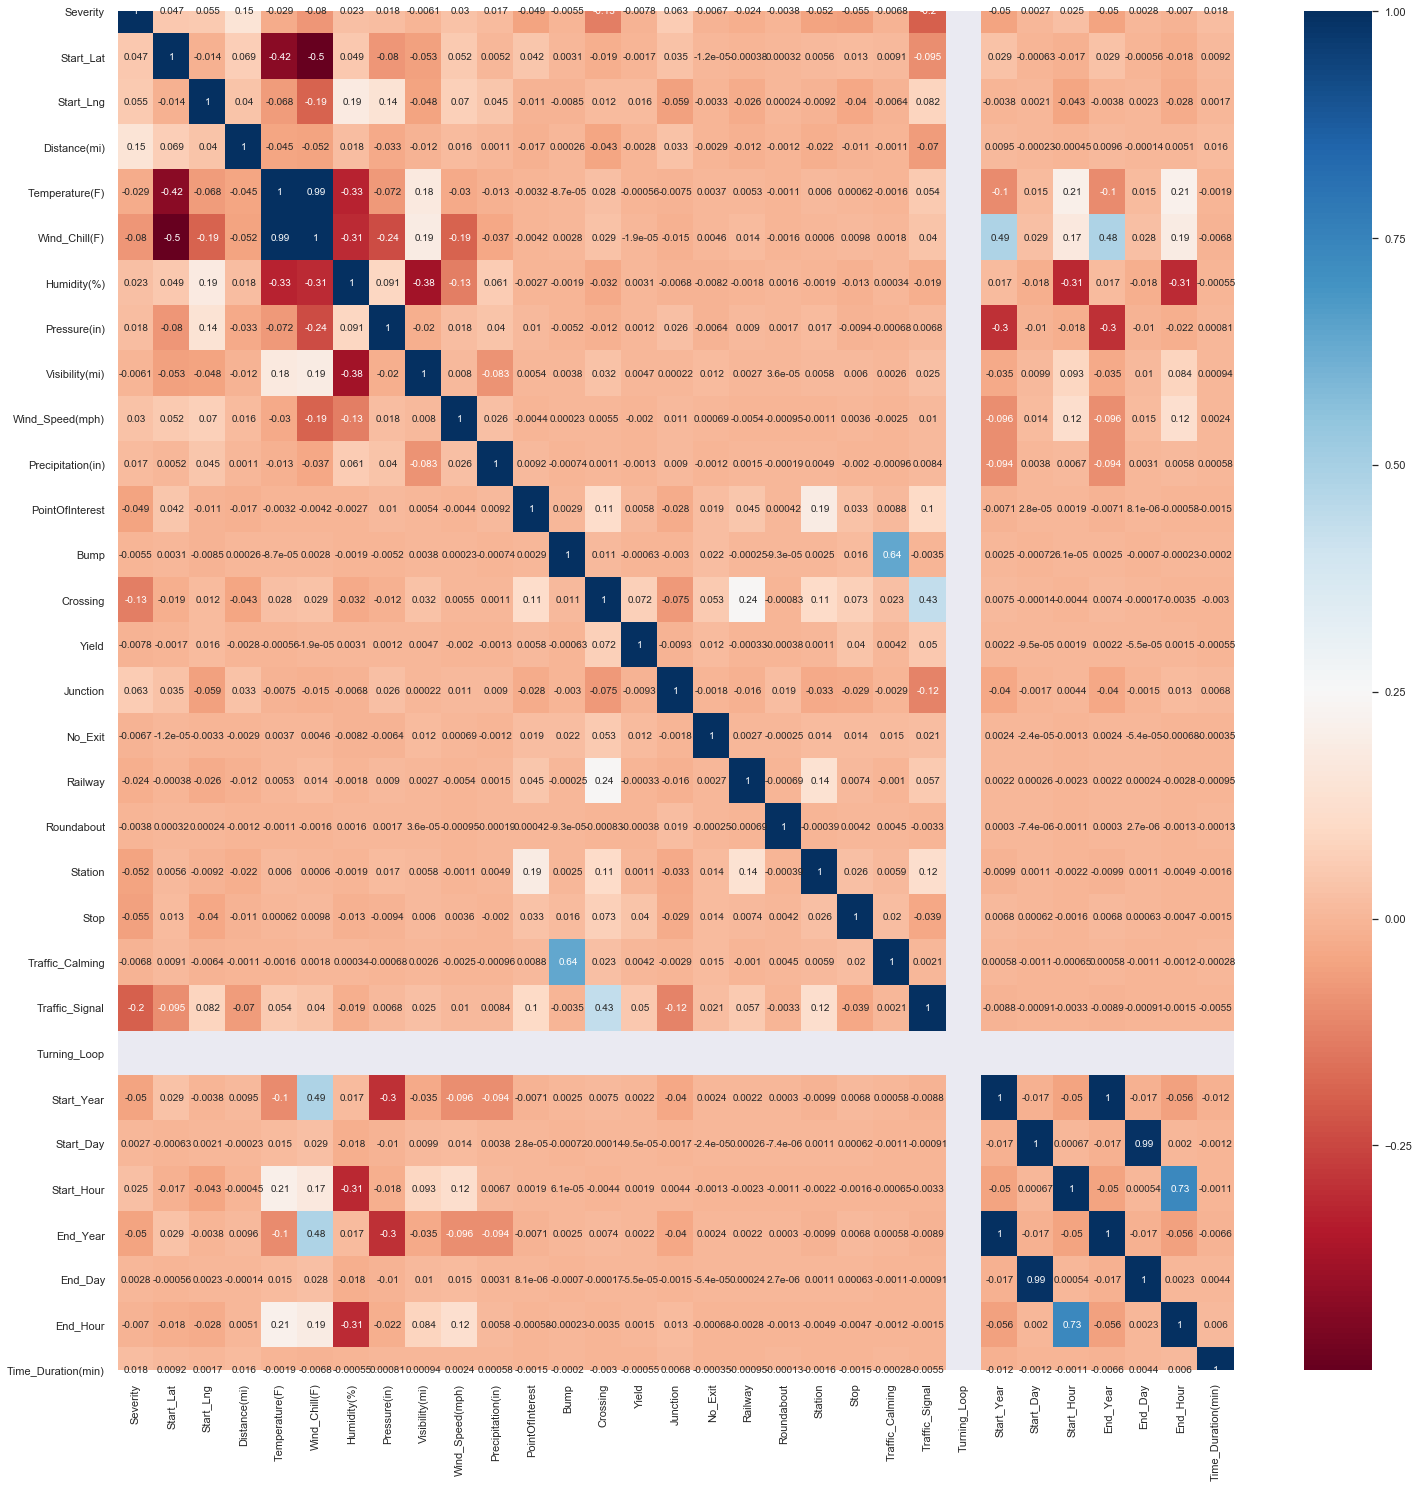

In [33]:
# Severity heatmap
plt.figure(figsize=(25,25))
c= df.corr()
sns.heatmap(c,cmap='RdBu',annot=True)
c

## Relationship Exploration - 10 pts

Many interesting relationships have been found while analyzing the data. When attempting to predict the severity of an accident we have seen in the relationship plots above that the type of weather has a relationship on the severity of the accident. We see more severity 2 accidents on clear days, then more severity 3 accidents and a few severity 4 accidents. Similar trends were seen when looking at the state the accident occurred in. In general, the higher the population of the state the more frequent a severity 2 accident were to occur. The same pattern occurred for severity 3 accidents as well. 

## Other Features - 5 pts

There are possibilities for new features to be added to this data set, some of which have already been added:

- Time Duration - this feature was created to make accident start/stop calculations easier
- Date/Time manipulations - the team created individual features for the component parts of the start and end times. This aided in analysis of accident data for various time based purposes and minimised coding efforts
- Twilight Classification - the team has discussed a new feature to leverage the three twilight classifications features currently available. The team feels that three features is two much but also wants to ensure minimal impact on data analysis

## Exceptional Work - 10 pts